# Assignment Python 3

Robi Dwiputra Satria

PYTN-KS09-024

Studi Independen - Kampus Merdeka

---

## Project Overview

Tujuan dari Assignment 3 ini adalah untuk melakukan prediksi data menggunakan berbagai model machine learning dengan Python sekonsisten mungkin. Dataset ini merupakan catatan kampanye pemasaran langsung dari lembaga perbankan Portugis.
> **Masalah yang dihadapi:** Proyek ini ditujukan untuk menganalisis data kampanye pemasaran sebelumnya dari lembaga perbankan Portugis dan untuk memprediksi apakah pelanggan akan berlangganan produk deposito berjangka yang ditawarkan bank.

## Import Library

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

## Dataset

### Deskripsi Singkat Dataset 

**Dataset:** Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan "yes" (ya) atau "no" (tidak) berlangganan. <br>

### Import Dataset

Dataset kampanye pemasaran langsung dari lembaga perbankan Portugis dapat diakses pada [link](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) berikut ini.

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# menentukan dimensi (baris, kolom) dataset
print(f'Ukuran dimensi data : {df.shape}')

Ukuran dimensi data : (41188, 21)


### Penjelasan Atribut/Fitur Dataset

Dataset memiliki 21 atribut dan terdapat 41188 instance/datapoints. Jadi terdapat 20 atribut prediktor/independen dan 1 atribut dependen.

* __Atribut klien bank__:
    1. age: umur klien (numerik)
    2. job : jenis pekerjaan (kategorik: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3. marital : status perkawinan (kategorik: 'divorced','married','single','unknown')
    4. education : pendidikan tertinggi klien (kategorik: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5. default: apakah memiliki default kredit? (kategorik: 'no','yes','unknown')
    6. housing: apakah memiliki pinjaman rumah? (kategorik: 'no','yes','unknown')
    7. loan: apakah memiliki pinjaman pribadi? (kategorik: 'no','yes','unknown') 
    
    
* __Atribut yang terkait dengan kontak terakhir dari kampanye saat ini__:
    1. contact: jenis alat komunikasi (kategorik: 'cellular','telephone')
    2. day_of_week: hari kontak terakhir dalam seminggu (kategorik: 'mon','tue','wed','thu','fri')
    3. month: kontak terakhir berdasarkan bulan (kategorik: 'mar', 'apr', 'mei', ..., 'nov', 'dec')
    4. duration: durasi kontak terakhir, dalam detik (numerik).
    
    
* __Atribut lainnya:__
    1. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
    2. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; -999 mengartikan klien sebelumnya tidak dihubungi)
    3. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
    4. poutcome: hasil dari kampanye pemasaran sebelumnya (kategorik: 'failure','nonexistent','success')
    
    
* __Atribut konteks sosial dan ekonomi:__
    1. emp.var.rate: tingkat variasi pekerjaan - indikator triwulanan (numerik)
    2. cons.price.idx: indeks harga konsumen - indikator bulanan (numerik)
    3. cons.conf.idx: indeks kepercayaan konsumen - indikator bulanan (numerik)
    4. euribor3m: biaya euribor 3 bulan - indikator harian (numerik)
    5. nr.employed: jumlah karyawan - indikator triwulanan (numerik)
    
    
* __Variabel output (target yang diinginkan)__:
    1. y: apakah pelanggan akan berlangganan produk deposito berjangka? (biner: yes('ya'), no('tidak'))

## EDA

### Klasifikasi Tipe data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Berikut ini daftar atribut kategorikal dan numerikal berdasarkan informasi DataFrame:

__Daftar atribut numerikal :__
1. age 
2. duration
3. campaign
4. pdays
5. previous
6. emp.var.rate
7. cons.price.idex
8. cons.conf.idx
9. euribor3m
10. nr.employed

__Daftar atribut kategorikal :__
1. job
2. marital 
3. education
4. default
5. housing
6. loan
7. contact
8. month
9. day_of_week
10. poutcome
11. y (target)

### Mengelompokkan kolom sesuai dengan tipe data (numerikal, kategorikal)

In [5]:
# membuat list 'num_cols' untuk menampung tipe data numerikal
num_cols = ["age","duration","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx",
            "euribor3m", "nr.employed"]

# membuat list 'cat_cols' untuk menampung tipe data kategorikal
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
            'poutcome','y']

# menggabungkan keseluruhan tipe data numerik yang tersimpan pada list 'num_cols'
num_cols = list(df.select_dtypes(include=['int64']) + df.select_dtypes(include=['float64']))

cat_cols = list(df.select_dtypes(include=['object']))

print(f"Fitur numerikal :\n{num_cols}")
print(f"Fitur kategorikal :\n{cat_cols}")

Fitur numerikal :
['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'duration', 'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays', 'previous']
Fitur kategorikal :
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


### Deskripsi Statistik

In [6]:
# Menampilkan deskripsi statistik data numerik
df[num_cols].describe()

,age,campaign,cons.conf.idx,cons.price.idx,duration,emp.var.rate,euribor3m,nr.employed,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,-40.502600,93.575664,258.285010,0.081886,3.621291,5167.035911,962.475454,0.172963
std,10.42125,2.770014,4.628198,0.578840,259.279249,1.570960,1.734447,72.251528,186.910907,0.494901
min,17.00000,1.000000,-50.800000,92.201000,0.000000,-3.400000,0.634000,4963.600000,0.000000,0.000000
25%,32.00000,1.000000,-42.700000,93.075000,102.000000,-1.800000,1.344000,5099.100000,999.000000,0.000000
50%,38.00000,2.000000,-41.800000,93.749000,180.000000,1.100000,4.857000,5191.000000,999.000000,0.000000
75%,47.00000,3.000000,-36.400000,93.994000,319.000000,1.400000,4.961000,5228.100000,999.000000,0.000000
max,98.00000,56.000000,-26.900000,94.767000,4918.000000,1.400000,5.045000,5228.100000,999.000000,7.000000


In [7]:
# # Menampilkan deskripsi statistik data kategorik
df[cat_cols].describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Data Cleansing

### Mengetahui Non-Standard Missing Values pada tipe data kategorikal

In [8]:
# Mengetahui jumlah nilai unik setiap kolom kategorik

for i in cat_cols:
    print('Jumlah nilai unik untuk kolom {} bernilai {} \n nilai unik = {}'.format
          (i, len(df[i].unique()), df[i].unique()))
    print('='*40)

Jumlah nilai unik untuk kolom job bernilai 12 
 nilai unik = ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Jumlah nilai unik untuk kolom marital bernilai 4 
 nilai unik = ['married' 'single' 'divorced' 'unknown']
Jumlah nilai unik untuk kolom education bernilai 8 
 nilai unik = ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Jumlah nilai unik untuk kolom default bernilai 3 
 nilai unik = ['no' 'unknown' 'yes']
Jumlah nilai unik untuk kolom housing bernilai 3 
 nilai unik = ['no' 'yes' 'unknown']
Jumlah nilai unik untuk kolom loan bernilai 3 
 nilai unik = ['no' 'yes' 'unknown']
Jumlah nilai unik untuk kolom contact bernilai 2 
 nilai unik = ['telephone' 'cellular']
Jumlah nilai unik untuk kolom month bernilai 10 
 nilai unik = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Jumlah nilai unik untuk kolom 

### Prediksi kesesuaian data berdasarkan pekerjaan dan pendidikan

**Analisis:** untuk memperoleh nilai 'unknown' dalam 'pekerjaan' dan 'pendidikan'


Untuk menyimpulkan nilai-nilai yang hilang dalam 'pekerjaan' dan 'pendidikan', dapat digunakan tabulasi antara 'pekerjaan' dan 'pendidikan'. Diperkirakan bahwa 'pekerjaan' dipengaruhi oleh 'pendidikan' seseorang. Oleh karena itu, dapat ditentukan bahwa 'pekerjaan' berdasarkan pendidikan orang tersebut.

In [9]:
# membuat tabulasi antara 'job' dan 'education'
def cross_tab(df,f_1,f_2):
    jobs=list(df[f_1].unique())
    edu=list(df[f_2].unique())
    edu_for_jobs =[]
    for e in edu:
        dfe=df[df[f_2]==e]
        dfejob=dfe.groupby(f_1).count()[f_2]
        edu_for_jobs.append(dfejob)
    ct=pd.concat(edu_for_jobs,axis=1)
    ct.columns=edu
    ct=ct.fillna(0)
    return ct

In [10]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


**Analisis:** Berdasarkan hipotesis kesesuaian data pekerjaan dan pendidikan, maka dapat suatu keadaan dapat dinyatakan sebagai berikut:
- Jika usia seseorang melebihi 60 maka data 'unknown' dianggap sebagai pensiunan
- Jika pendidikan seseorang tidak diketahui dan dia bekerja sebagai housemaid (pembantu) maka dianggap sebagai pendidikan seseorang tersebut adalah basic.4y
- Jika pendidikan seseorang tidak diketahui dan dia bekerja sebagai service (customer service) maka dianggap sebagai pendidikan seseorang tersebut adalah high school (pendidikan menengah)
- Jika pendidikan seseorang tidak diketahui dan dia bekerja sebagai manajer maka dianggap sebagai pendidikan seseorang tersebut adalah university degree (pendidikan tinggi)
- Jika pekerjaan seseorang tidak diketahui dan dia berpendidikan sebagai basic.4y, basic.6y dan basic.9y maka dianggap sebagai pekerjaan seseorang tersebut adalah blue-collar (pekerja kerah biru)
- Jika pekerjaan seseorang tidak diketahui dan dia berlatar belakang pendidikan sebagai profesional course maka dianggap sebagai pekerjaan seseorang tersebut adalah teknisi

In [11]:
# melakukan seleksi baris berdasarkan hipotesis kesesuaian data pekerjaan dan pendidikan

df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [12]:
# memastikan kembali bahwa terjadi perubahan jumlah pada fitur 'job' dan 'education'

cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


#### Mengetahui jumlah data 'unknown'

In [13]:
jumlah_unknown = df[df[cat_cols] == 'unknown'].count().sort_values(ascending=False)
print(jumlah_unknown)

default           8597
education         1416
housing            990
loan               990
job                198
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64


**Analisis:** Berdasarkan perhitungan data yang mengandung __'unknown'__ pada tipe data kategorikal, dapat diketahui bahwa fitur [__'default', 'education', 'housing', 'loan', 'job', 'marital'__] mengandung _unexpected missing values_, karena data yang tercatat 'unknown' merupakan data yang tidak diharapkan, sehingga data __'unknown'__ akan digantikan dengan data missing values (NaN).

In [14]:
# menghapus missing values pada default

df = df[df['default'] != 'unknown']

### Mengganti  'unknown' menjadi missing values

In [15]:
df[df[cat_cols] == 'unknown'] = np.nan

In [16]:
df.isnull().sum()

age                 0
job                95
marital            69
education         947
default             0
housing           763
loan              763
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

**Analisis:** Tidak terdapat 'unknown' pada tipe data kategorikal, karena data 'unknown' telah dijadikan sebagai missing values (NaN).

### Mengganti missing values pada kolom tipe kategorik dengan nilai modus

In [17]:
df['job'].fillna(df['job'].mode()[0], inplace = True)
df['marital'].fillna(df['marital'].mode()[0], inplace = True)
df['education'].fillna(df['education'].mode()[0], inplace = True)
df['housing'].fillna(df['housing'].mode()[0], inplace = True)
df['loan'].fillna(df['loan'].mode()[0], inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32591 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32591 non-null  int64  
 1   job             32591 non-null  object 
 2   marital         32591 non-null  object 
 3   education       32591 non-null  object 
 4   default         32591 non-null  object 
 5   housing         32591 non-null  object 
 6   loan            32591 non-null  object 
 7   contact         32591 non-null  object 
 8   month           32591 non-null  object 
 9   day_of_week     32591 non-null  object 
 10  duration        32591 non-null  int64  
 11  campaign        32591 non-null  int64  
 12  pdays           32591 non-null  int64  
 13  previous        32591 non-null  int64  
 14  poutcome        32591 non-null  object 
 15  emp.var.rate    32591 non-null  float64
 16  cons.price.idx  32591 non-null  float64
 17  cons.conf.idx   32591 non-null 

In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Mengetahui Non-Standard dan Unexpected Missing Values pada tipe data numerikal

In [20]:
# Mengetahui jumlah dan nilai unik setiap kolom numerik

for i in num_cols:
    print('Jumlah nilai unik untuk kolom {} bernilai {} \n nilai unik = {}'.format
          (i, len(df[i].unique()), df[i].unique()))
    print('='*40)

Jumlah nilai unik untuk kolom age bernilai 77 
 nilai unik = [56 37 40 59 24 25 29 57 35 50 30 55 41 46 49 54 34 52 58 32 38 45 39 60
 53 51 48 44 33 31 42 36 43 28 27 47 26 22 23 20 21 61 18 70 66 76 67 73
 88 95 19 77 68 75 63 62 65 72 82 64 71 69 78 85 80 79 83 81 74 17 87 91
 86 94 84 92 89]
Jumlah nilai unik untuk kolom campaign bernilai 41 
 nilai unik = [ 1  2  3  4  5  6  7  8  9 10 12 19 11 18 23 13 14 22 25 17 15 20 39 42
 16 28 26 32 21 24 29 31 30 35 41 37 27 40 43 34 33]
Jumlah nilai unik untuk kolom cons.conf.idx bernilai 26 
 nilai unik = [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
Jumlah nilai unik untuk kolom cons.price.idx bernilai 26 
 nilai unik = [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
Jumlah nilai unik untu

**Analisis:** Terdapat _unexpected missing values_ pada fitur **pdays**, berdasarkan deskripsi dataset apabila mengandung data bernilai **999** (data yang tidak diharapkan) dan nilai tersebut sangat berbeda jika dibandingkan dengan ke-26 data lainnya pada kolom yang sama, hal ini menanandakan bahwa pelanggan tidak pernah dihubungi sebelumnya, maka nilai tersebut akan diganti menjadi 0.

In [21]:
## mengubah 999 menjadi 0
df['pdays'].replace(999,0, inplace = True)

In [22]:
# menghapus kolom duration == 0
df = df[~df['duration'].isin([0])]

In [23]:
# menampilkan 5 baris pertama
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
df.shape

(32587, 21)

## Jumlah total missing values

In [25]:
# mengetahui jumlah keseluruhan missing values 

print('Jumlah missing values fitur kategorikal =', 
      df[cat_cols].isnull().sum().sum())

print('Jumlah missing values fitur numerikal =', 
      df[num_cols].isnull().sum().sum())

Jumlah missing values fitur kategorikal = 0
Jumlah missing values fitur numerikal = 0


**Analisis:** Missing values pada kolom kategorikal akan diisi dengan nilai modus

### Menangani outliers (data pencilan)

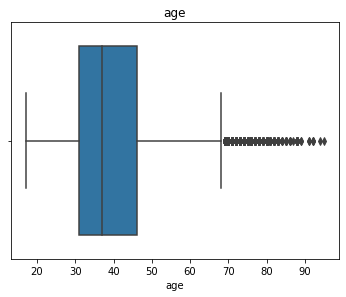

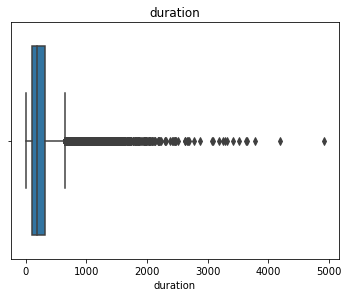

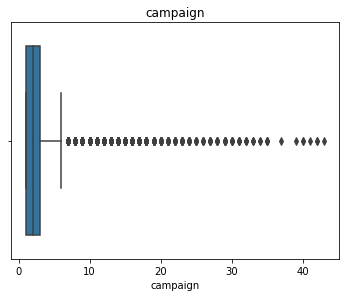

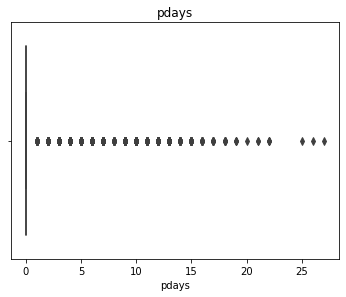

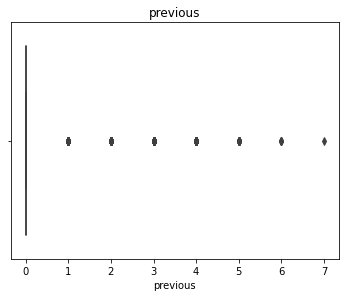

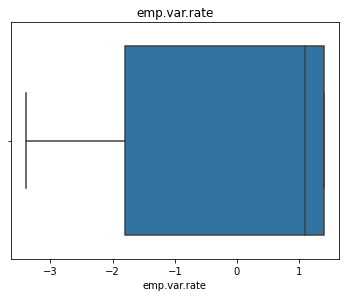

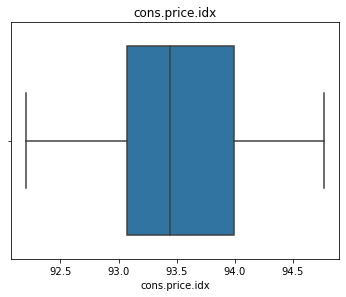

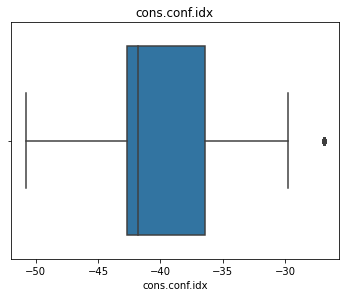

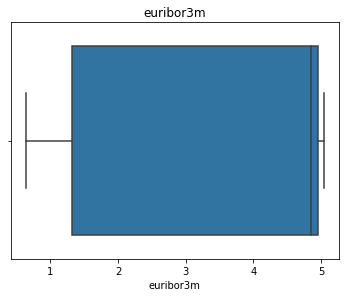

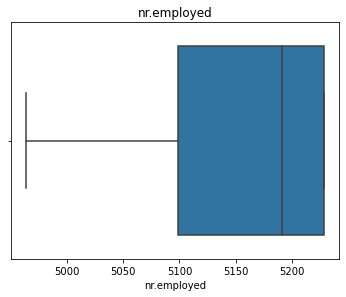

In [26]:
# melakukan seleksi kolom untuk kolom numerik
col=df[["age","duration","campaign", "pdays", "previous","emp.var.rate",
        "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]

# melakukan plotting boxplot untuk setiap numerik
for i in col:
    n=1
    plt.figure(figsize=(20,20))
    plt.subplot(4,3,1)
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()
    n=n+1

### Mengatasi outliers dengan Z-score

In [27]:
#mengatasi dengan z-score
z = np.abs(stats.zscore(df[num_cols]))
print(z)
df=df[(z<3).all(axis=1)]

            age  campaign  cons.conf.idx  cons.price.idx  duration  \
0      1.609317  0.561508       0.866916        0.795832  0.004367   
2      0.204283  0.561508       0.866916        0.795832  0.129703   
3      0.082075  0.561508       0.866916        0.795832  0.416995   
4      1.609317  0.561508       0.866916        0.795832  0.180573   
6      1.895675  0.561508       0.866916        0.795832  0.462962   
...         ...       ...            ...             ...       ...   
41183  3.232011  0.561508       2.130252        2.109320  0.283998   
41184  0.654791  0.561508       2.130252        2.109320  0.471696   
41185  1.609317  0.192183       2.130252        2.109320  0.271434   
41186  0.463886  0.561508       2.130252        2.109320  0.697699   
41187  3.327464  0.177143       2.130252        2.109320  0.079906   

       emp.var.rate  euribor3m  nr.employed     pdays  previous  
0          0.730768   0.790208     0.409046  0.180753  0.373766  
2          0.730768   0.790

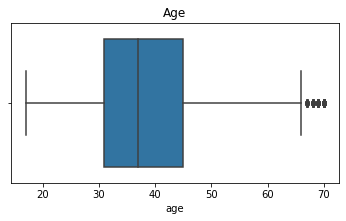

In [28]:
# mengecek kembali outliers
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.title("Age")
plt.show()

## Visualisasi Data

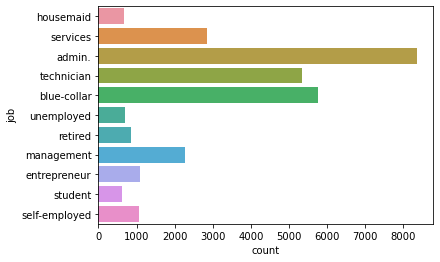

In [29]:
sns.countplot(y='job', data=df)
plt.show()

Pelanggan dengan profesi sebagai **admin** merupakan populasi terbanyak dalam proses kampanye yang diselenggarakan oleh lembaga perbankan Portugis

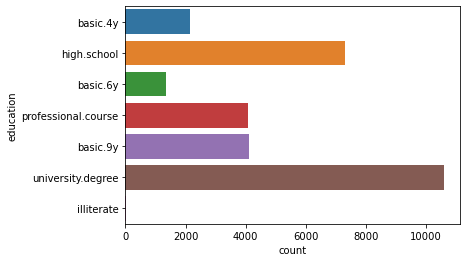

In [30]:
sns.countplot(y='education', data=df)
plt.show()

Pelanggan dengan pendidikan sebagai **sarjana/pendidikan tinggi** merupakan populasi terbanyak dalam proses kampanye yang diselenggarakan oleh lembaga perbankan Portugis

### Memishakan variabel independen (fitur) dan variabel dependen (target)

In [31]:
# X merupakan variabel independen
X=df.drop(['y'],axis=1)
# y merupakan variabel dependen
y=df['y']          
df['y'].value_counts()

no     26678
yes     2869
Name: y, dtype: int64

In [32]:
print(f'Ukuran dimensi fitur X: {X.shape}')
print(f'jumlah data target y: {y.shape}')

Ukuran dimensi fitur X: (29547, 20)
jumlah data target y: (29547,)


### Mengganti fitur y menjadi bilangan biner

In [33]:
from sklearn.preprocessing import LabelBinarizer

# melakukan perubahan data kategorik ('no' dan 'yes') menjadi ('0' dan '1')
lb = LabelBinarizer()
y = lb.fit_transform(y)
y = pd.DataFrame(y)

In [34]:
print(X.shape)
print(y.shape)

(29547, 20)
(29547, 1)


In [35]:
# mereduksi dimensi target menjadi 1 dimensi
y = np.array(y)
y = y.flatten()
y

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
# mengetahui jumlah data kelas target
print(len(y))

29547


In [37]:
# konversi data kategori menjadi kolom
X_dummy = pd.get_dummies(X, drop_first=True)
X_test = pd.get_dummies(X, drop_first = True)

In [38]:
#mengubah dataframe menjadi array
X = X_dummy.values

## Melakukan proses training dan testing data

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [40]:
# mengetahui dimensi dari data atribut dan target

print(f"Dimensi atribut data latih = {X_train.shape}")
print(f"Dimensi target data latih = {y_train.shape}")
print(f"Dimensi atribut data uji = {X_test.shape}")
print(f"Dimensi target data uji = {y_test.shape}")

Dimensi atribut data latih = (20682, 47)
Dimensi target data latih = (20682,)
Dimensi atribut data uji = (8865, 47)
Dimensi target data uji = (8865,)


### Melakukan standarisasi data menggunakan StandardScaler

In [41]:
# instansiasi kelas StandardScaler
standard_scaler = StandardScaler()

# fit scaler ke train data
standard_scaler.fit(X_train)

# transform data dengan menggunakan scaler
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

## Model Machine Learning

### Logistic Regression

#### Hyperparameter tuning Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}
from sklearn.model_selection import RandomizedSearchCV

model_lr = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model_lr, parameters, cv=5, random_state=1, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_train, y_train)
print('Parameter terbaik:  {}'.format(clf.best_params_))
print('Skor terbaik: {}'.format(clf.best_score_))

Parameter terbaik:  {'C': 0.30000000000000004}
Skor terbaik: 0.9270076805720657


#### Training Logistic Regression dengan hyperparameter terbaik

In [43]:
model_lr = LogisticRegression(C=0.3)
model_lr.fit(X_train, y_train)

LogisticRegression(C=0.3)

In [44]:
y_pred1 = model_lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred1))

Accuracy:  0.9191201353637902


In [45]:
# Evaluasi model Logistic Regression

acc_lr=accuracy_score(y_test,y_pred1)
recall_lr=recall_score(y_test,y_pred1)
precision_lr=precision_score(y_test,y_pred1)
f1score_lr=f1_score(y_test,y_pred1)

matrix_1 = confusion_matrix(y_test, y_pred1)
matrix_1

array([[7860,  180],
       [ 537,  288]], dtype=int64)

In [46]:
tn, fp, fn, tp = matrix_1.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 7860
FP: 180
FN: 537
TP: 288


[[7860  180]
 [ 537  288]]


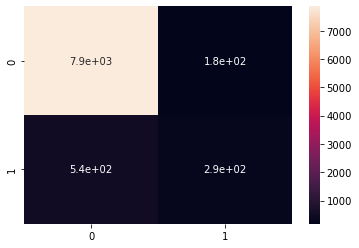

In [47]:
cm=confusion_matrix(y_test,y_pred1)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

### K-Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

model_neighbors = KNeighborsClassifier(n_neighbors=7)
model_neighbors.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
y_pred1_ = model_neighbors.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred1_))

Accuracy:  0.9093062605752961


In [50]:
# Evaluasi model K-Nearest Neighbors

acc_kNN=accuracy_score(y_test,y_pred1_)
recall_kNN=recall_score(y_test,y_pred1_)
precision_kNN=precision_score(y_test,y_pred1_)
f1_score_kNN=f1_score(y_test,y_pred1_)

matrix1_ = confusion_matrix(y_test, y_pred1_)
matrix1_

array([[7890,  150],
       [ 654,  171]], dtype=int64)

In [51]:
tn1_, fp1_, fn1_, tp1_ = matrix1_.ravel()

print(f'TN: {tn1_}')
print(f'FP: {fp1_}')
print(f'FN: {fn1_}')
print(f'TP: {tp1_}')

TN: 7890
FP: 150
FN: 654
TP: 171


[[7890  150]
 [ 654  171]]


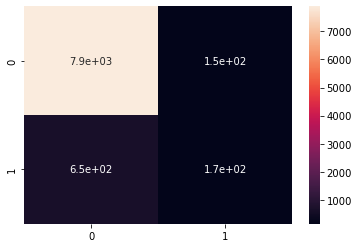

In [52]:
cm1_=confusion_matrix(y_test,y_pred1_)
print(cm1_)
sns.heatmap(cm1_,annot=True)
plt.show()

### SVC

#### Hyperparameter tuning SVC

In [53]:
from sklearn.linear_model import SGDClassifier

params = {'alpha': [10**i for i in range(-4, 5)]}
CV_model_svc = SGDClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(CV_model_svc, param_distributions=params, cv=5, scoring='roc_auc', random_state=1, n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)
print('parameter terbaik:  {}'.format(clf.best_params_))
print('skor terbaik: {}'.format(clf.best_score_))

parameter terbaik:  {'alpha': 0.01}
skor terbaik: 0.924970209531579


#### Training SVC dengan hyperparameter terbaik

In [54]:
from sklearn.svm import SVC
CV_model_svc = SGDClassifier(alpha=0.01, class_weight='balanced', n_jobs=-1)
CV_model_svc.fit(X_train, y_train)

y_pred2 = CV_model_svc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred2))

Accuracy:  0.8341793570219966


In [55]:
# Melakukan evaluasi model K-Nearest Neighbors

acc_SVC=accuracy_score(y_test,y_pred2)
recall_SVC=recall_score(y_test,y_pred2)
precision_SVC=precision_score(y_test,y_pred2)
f1score_SVC=f1_score(y_test,y_pred2)

matrix_2 = confusion_matrix(y_test, y_pred2)
matrix_2

array([[6656, 1384],
       [  86,  739]], dtype=int64)

In [56]:
tn2, fp2, fn2, tp2 = matrix_2.ravel()

print(f'TN: {tn2}')
print(f'FP: {fp2}')
print(f'FN: {fn2}')
print(f'TP: {tp2}')

TN: 6656
FP: 1384
FN: 86
TP: 739


[[7860  180]
 [ 537  288]]


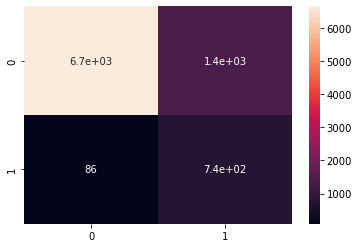

In [57]:
cm_2=confusion_matrix(y_test,y_pred2)
print(cm)
sns.heatmap(cm_2,annot=True)
plt.show()

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=25)
model_tree.fit(X_train, y_train)

y_pred3 = model_tree.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred3))

Accuracy:  0.8979131415679639


In [59]:
# Evaluasi model Decision Tree

acc_tree=accuracy_score(y_test,y_pred3)
recall_tree=recall_score(y_test,y_pred3)
precision_tree=precision_score(y_test,y_pred3)
f1score_tree=f1_score(y_test,y_pred3)

matrix_3 = confusion_matrix(y_test, y_pred3)
matrix_3

array([[7558,  482],
       [ 423,  402]], dtype=int64)

In [60]:
tn3, fp3, fn3, tp3 = matrix_3.ravel()

print(f'TN: {tn3}')
print(f'FP: {fp3}')
print(f'FN: {fn3}')
print(f'TP: {tp3}')

TN: 7558
FP: 482
FN: 423
TP: 402


[[7558  482]
 [ 423  402]]


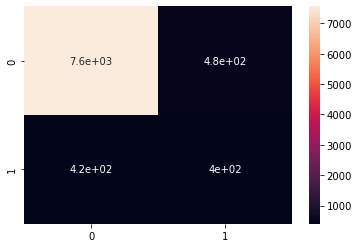

In [61]:
cm_3=confusion_matrix(y_test,y_pred3)
print(cm_3)
sns.heatmap(cm_3,annot=True)
plt.show()

### Random Forest

#### Hyperparameter Tuning Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf_rFs = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=1, n_jobs=-1, return_train_score=True)
clf_rFs.fit(X_train, y_train)
print('Best parameters:  {}'.format(clf_rFs.best_params_))
print('Best score: {}'.format(clf_rFs.best_score_))

Best parameters:  {'n_estimators': 250, 'max_depth': 15}
Best score: 0.9316332665920142


#### Training Random Forest dengan hyperparameter terbaik

In [63]:
from sklearn.ensemble import RandomForestClassifier
model_rFs = RandomForestClassifier(n_estimators = 250, max_depth = 15)
model_rFs.fit(X_train, y_train)

y_pred4 = model_rFs.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred4))

Accuracy:  0.9219402143260012


In [64]:
y_pred4 = model_rFs.predict(X_test)
acc_rFs=accuracy_score(y_test,y_pred4)
recall_rFs=recall_score(y_test,y_pred4)
precision_rFs=precision_score(y_test,y_pred4)
f1score_rFs=f1_score(y_test,y_pred4)

matrix_4 = confusion_matrix(y_test, y_pred4)
matrix_4

array([[7886,  154],
       [ 538,  287]], dtype=int64)

In [65]:
tn4, fp4, fn4, tp4 = matrix_4.ravel()

print(f'TN: {tn4}')
print(f'FP: {fp4}')
print(f'FN: {fn4}')
print(f'TP: {tp4}')

TN: 7886
FP: 154
FN: 538
TP: 287


[[7886  154]
 [ 538  287]]


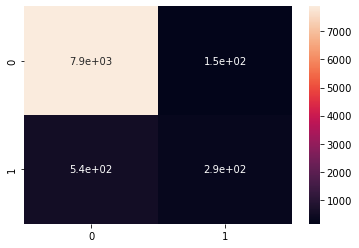

In [66]:
cm_4=confusion_matrix(y_test,y_pred4)
print(cm_4)
sns.heatmap(cm_4,annot=True)
plt.show()

### Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(X_train, y_train)

y_pred5 = model_naive_bayes.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred5))

Accuracy:  0.7208121827411168


In [68]:
# evaluasi model Naive Bayes

acc_naive_bayes=accuracy_score(y_test,y_pred5)
recall_naive_bayes=recall_score(y_test,y_pred5)
precision_naive_bayes=precision_score(y_test,y_pred5)
f1_score_naive_bayes=f1_score(y_test,y_pred5)

matrix_5 = confusion_matrix(y_test, y_pred5)
matrix_5

array([[5720, 2320],
       [ 155,  670]], dtype=int64)

In [69]:
tn5, fp5, fn5, tp5 = matrix_5.ravel()

print(f'TN: {tn5}')
print(f'FP: {fp5}')
print(f'FN: {fn5}')
print(f'TP: {tp5}')

TN: 5720
FP: 2320
FN: 155
TP: 670


[[5720 2320]
 [ 155  670]]


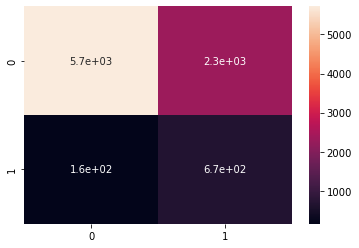

In [70]:
cm_5=confusion_matrix(y_test,y_pred5)
print(cm_5)
sns.heatmap(cm_5,annot=True)
plt.show()

## Model terbaik

In [71]:
index_data=['Logistic Regression', 'KNeighbors', 'SVM','Decision Tree', 'Random Forest', 'Naive Bayes']
data={"Accuracy":[acc_lr,acc_kNN,acc_SVC,acc_tree,acc_rFs,acc_naive_bayes],
      "Recall":[recall_lr,recall_kNN,recall_SVC,recall_tree,recall_rFs,recall_naive_bayes],
      "Precision":[precision_lr,precision_kNN,precision_SVC,precision_tree,precision_rFs,precision_naive_bayes],
      "F1_Score":[f1score_lr,f1_score_kNN,f1score_SVC,f1score_tree,f1score_rFs,f1_score_naive_bayes]}
result=pd.DataFrame(data=data,index=index_data)
result

,Accuracy,Recall,Precision,F1_Score
Logistic Regression,0.919120,0.349091,0.615385,0.445476
KNeighbors,0.909306,0.207273,0.532710,0.298429
SVM,0.834179,0.895758,0.348092,0.501357
Decision Tree,0.897913,0.487273,0.454751,0.470451
Random Forest,0.921940,0.347879,0.650794,0.453397
Naive Bayes,0.720812,0.812121,0.224080,0.351245


### Overall Analysis:

Model dengan Random Forest dianggap sebagai model terbaik. Dari 6 model diatas, Random Forest memiliki akurasi tertinggi 0.921940